# Dimension reduction with PCA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_curve
import random
from sklearn.neural_network import MLPClassifier

## df_merged_mean_15x15

In [2]:
df_merged_mean_15x15 = pd.read_csv('data/df_merged_mean_15x15_final.csv')
df_merged_mean_15x15

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,riskLevelLabel
0,2020-01-22,ukd4305-43260,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
1,2020-02-17,ukk3106-27200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
2,2020-02-29,ukk4304-34200,0.0,0.0,0.206118,0.173157,0.127656,0.066746,0.0,0.0,...,0.185487,0.127656,0.073864,0.0,0.0,0.206118,0.177503,0.127656,0.069289,1
3,2020-03-01,ukk4305-25400,0.0,0.0,0.097241,0.098771,0.247233,0.026437,0.0,0.0,...,0.105168,0.243885,0.028865,0.0,0.0,0.097241,0.101709,0.247233,0.027571,1
4,2020-03-12,uke1200-08100,0.0,0.0,0.163267,0.201963,0.107813,0.085368,0.0,0.0,...,0.216346,0.107813,0.094473,0.0,0.0,0.163267,0.207033,0.107813,0.088622,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,2022-11-08,ukj3400-17700,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
187107,2022-12-02,ukk3103-29500,0.0,0.0,0.029326,0.058402,0.482674,0.010515,0.0,0.0,...,0.062560,0.482674,0.011637,0.0,0.0,0.029326,0.059867,0.482674,0.010916,1
187108,2022-12-07,ukk3103-29100,0.0,0.0,0.022588,0.178036,0.150990,0.075031,0.0,0.0,...,0.156235,0.137526,0.055946,0.0,0.0,0.018829,0.182504,0.155471,0.077890,1
187109,2022-12-08,ukk3103-29100,0.0,0.0,0.017684,0.076698,0.330753,0.016954,0.0,0.0,...,0.081440,0.329495,0.018444,0.0,0.0,0.016590,0.078670,0.333127,0.017600,0


In [2]:
train_labels_mean_zero = pd.read_csv('data/train_labels_mean_zero.csv')[['time', 'site']]
train_labels_mean_zero

,time,site
0,2021-05-25,ukk4305-25800
1,2022-07-04,ukk4305-25800
2,2022-08-08,ukk3105-31450
3,2022-08-27,ukk2206-20800
4,2020-06-08,uke1301-09020
...,...,...
112261,2021-07-19,ukj4210-12660
112262,2021-05-10,ukk4200-23200
112263,2020-08-10,ukk3104-33500
112264,2021-09-08,ukk1202-35700


In [3]:
validation_labels_mean_zero = pd.read_csv('data/validation_labels_mean_zero.csv')[['time', 'site']]
validation_labels_mean_zero

,time,site
0,2020-07-02,ukj3400-17400
1,2022-08-27,ukk3106-32200
2,2021-05-06,ukk4307-33900
3,2021-05-20,ukk4304-34100
4,2021-06-04,ukk3104-33200
...,...,...
37417,2021-07-28,ukk3103-29800
37418,2021-05-02,uke2206-07200
37419,2022-09-08,ukk4301-21800
37420,2021-07-18,ukj2403-15900


In [4]:
test_labels_mean_zero = pd.read_csv('data/test_labels_mean_zero.csv')[['time', 'site']]
test_labels_mean_zero

,time,site
0,2022-09-21,ukk3106-32100
1,2020-08-08,ukh1407-10750
2,2020-09-20,ukd4200-42100
3,2022-07-06,ukk2206-20900
4,2021-08-24,ukk4305-26100
...,...,...
37418,2021-09-22,ukj2402-15680
37419,2021-08-14,ukk3104-33500
37420,2022-05-20,ukk4305-25600
37421,2022-06-25,ukj3400-18000


In [7]:
df_train = df_merged_mean_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')
df_val = df_merged_mean_15x15.merge(validation_labels_mean_zero, on=['time', 'site'], how='inner')
df_test = df_merged_mean_15x15.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_val.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_val = df_val.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_val = df_val
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Validation X Shape:', X_val.shape)
print('Validation y Shape:', y_val.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)
Validation X Shape: (37422, 192)
Validation y Shape: (37422,)
Testing X Shape: (37423, 192)
Testing y Shape: (37423,)


In [9]:
# test the total explained variance by increasing the number of components
total_variance = []
n_components = np.arange(3, X_train.shape[1] + 1)
for n in n_components:
    pca = PCA(n_components=n, random_state=100)
    pca.fit_transform(X_train)
    variance = pca.explained_variance_ratio_.sum()
    total_variance.append(variance)

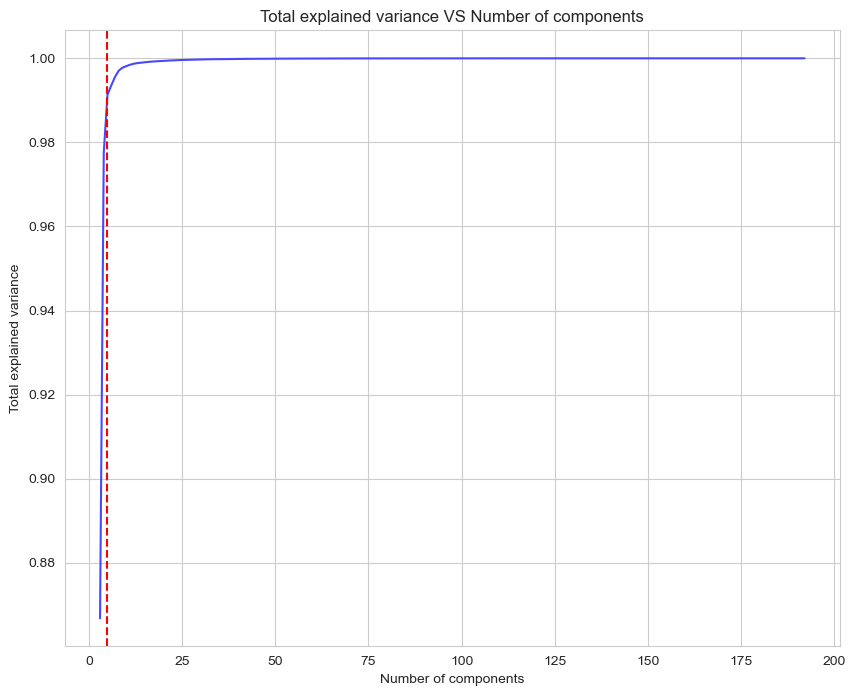

We choose 5 as the number of principle component, as 99% variance can be explained by 5 components.


In [13]:
threshold = 0.99
optimal_n = next((n for n, variance in zip(n_components, total_variance) if variance >= threshold), None)

sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.figure(figsize=(10, 8))
plt.plot(n_components, total_variance)
plt.axvline(x=optimal_n, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.title('Total explained variance VS Number of components')
plt.savefig('results/PCA_for_mean.png')
plt.show()

print(f"We choose {optimal_n} as the number of principle component, as 99% variance can be explained by {optimal_n} components.")

In [14]:
## Fit X_train, X_val, X_test with the PCA
pca = PCA(n_components = 5, random_state = 100)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_val_pc = pca.transform(X_val)
X_test_pc = pca.transform(X_test)
print('the shape of X_train after PCA:',X_train_pc.shape,'the shape of y train:',y_train.shape)
print('the shape of X_val after PCA:',X_val_pc.shape,'the shape of y train:',y_val.shape)
print('the shape of X_test after PCA:',X_test_pc.shape,'the shape of y test:',y_test.shape)

the shape of X_train after PCA: (112266, 5) the shape of y train: (112266,)
the shape of X_val after PCA: (37422, 5) the shape of y train: (37422,)
the shape of X_test after PCA: (37423, 5) the shape of y test: (37423,)


## df_merged_neg_15x15

In [5]:
df_merged_neg_15x15 = pd.read_csv('data/df_merged_neg_15x15_final.csv')
df_merged_neg_15x15

,time,site,BBP_1x1_median,CDM_1x1_median,SPM_1x1_median,KD490_1x1_median,ZSD_1x1_median,CHL_1x1_median,BBP_1x1_mean,CDM_1x1_mean,...,KD490_15x15_q1,ZSD_15x15_q1,CHL_15x15_q1,BBP_15x15_q3,CDM_15x15_q3,SPM_15x15_q3,KD490_15x15_q3,ZSD_15x15_q3,CHL_15x15_q3,riskLevelLabel
0,2020-01-22,ukd4305-43260,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
1,2020-02-17,ukk3106-27200,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1
2,2020-02-29,ukk4304-34200,0.0,0.0,0.278289,0.905697,0.381887,0.191762,0.0,0.0,...,0.912616,0.381887,0.209223,0.0,0.0,0.278289,0.908233,0.381887,0.198058,1
3,2020-03-01,ukk4305-25400,0.0,0.0,0.179310,0.897213,0.466615,0.156853,0.0,0.0,...,0.903999,0.464243,0.170801,0.0,0.0,0.179310,0.899777,0.466615,0.162112,1
4,2020-03-12,uke1200-08100,0.0,0.0,0.239333,0.908982,0.367827,0.207890,0.0,0.0,...,0.915927,0.367827,0.226820,0.0,0.0,0.239333,0.911528,0.367827,0.214716,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187106,2022-11-08,ukj3400-17700,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
187107,2022-12-02,ukk3103-29500,0.0,0.0,0.117570,0.892609,0.633440,0.143064,0.0,0.0,...,0.899428,0.633440,0.156091,0.0,0.0,0.117570,0.895108,0.633440,0.147761,1
187108,2022-12-07,ukk3103-29100,0.0,0.0,0.111443,0.906253,0.398421,0.198937,0.0,0.0,...,0.909478,0.388881,0.193924,0.0,0.0,0.108026,0.908791,0.401596,0.205469,1
187109,2022-12-08,ukk3103-29100,0.0,0.0,0.106985,0.894695,0.525795,0.148640,0.0,0.0,...,0.901454,0.524903,0.161904,0.0,0.0,0.105991,0.897206,0.527476,0.153521,0


In [6]:
df_train = df_merged_neg_15x15.merge(train_labels_mean_zero, on=['time', 'site'], how='inner')
df_val = df_merged_neg_15x15.merge(validation_labels_mean_zero, on=['time', 'site'], how='inner')
df_test = df_merged_neg_15x15.merge(test_labels_mean_zero, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_val.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_val = df_val.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_val = df_val
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Validation X Shape:', X_val.shape)
print('Validation y Shape:', y_val.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (112266, 192)
Training y Shape: (112266,)
Validation X Shape: (37422, 192)
Validation y Shape: (37422,)
Testing X Shape: (37423, 192)
Testing y Shape: (37423,)


In [7]:
# test the total explained variance by increasing the number of components
total_variance = []
n_components = np.arange(3, X_train.shape[1] + 1)
for n in n_components:
    pca = PCA(n_components=n, random_state=100)
    pca.fit_transform(X_train)
    variance = pca.explained_variance_ratio_.sum()
    total_variance.append(variance)

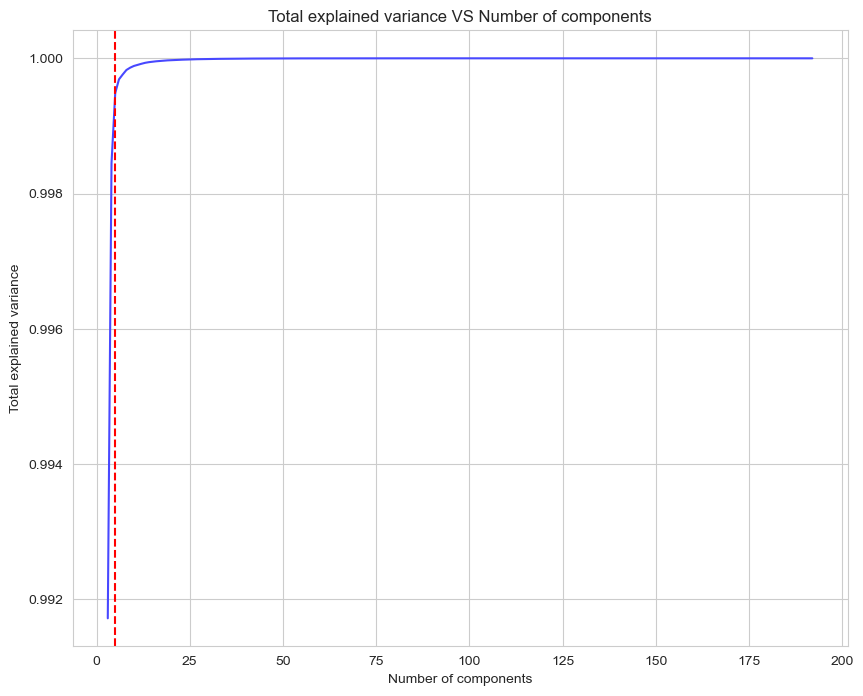

We choose 5 as the number of principle component, as 99% variance can be explained by 5 components.


In [21]:
threshold = 0.999
optimal_n = next((n for n, variance in zip(n_components, total_variance) if variance >= threshold), None)

sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.figure(figsize=(10, 8))
plt.plot(n_components, total_variance)
plt.axvline(x=optimal_n, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.title('Total explained variance VS Number of components')
plt.savefig('results/PCA_for_neg.png')
plt.show()

print(f"We choose {optimal_n} as the number of principle component, as 99% variance can be explained by {optimal_n} components.")

In [22]:
## Fit X_train, X_val, X_test with the PCA
pca = PCA(n_components = 5, random_state = 100)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_val_pc = pca.transform(X_val)
X_test_pc = pca.transform(X_test)
print('the shape of X_train after PCA:',X_train_pc.shape,'the shape of y train:',y_train.shape)
print('the shape of X_val after PCA:',X_val_pc.shape,'the shape of y train:',y_val.shape)
print('the shape of X_test after PCA:',X_test_pc.shape,'the shape of y test:',y_test.shape)

the shape of X_train after PCA: (112266, 5) the shape of y train: (112266,)
the shape of X_val after PCA: (37422, 5) the shape of y train: (37422,)
the shape of X_test after PCA: (37423, 5) the shape of y test: (37423,)
